# x와 y의 일관성 차트(Coherence)

- 두 변수간의 관계를 알수 있는 차트
- 두 변수간의 차이를 시각화함으로써 한 단위(ex. 시간)이 변화함에 따라 두 변수가 어떤 차이를 갖게 해주는 지를 알게해준다.

In [3]:
import numpy as np
import matplotlib.pyplot as plt

plt.style.use(['seaborn-notebook'])
plt.rcParams['font.size']=12
plt.rcParams['figure.figsize']=(12,9)

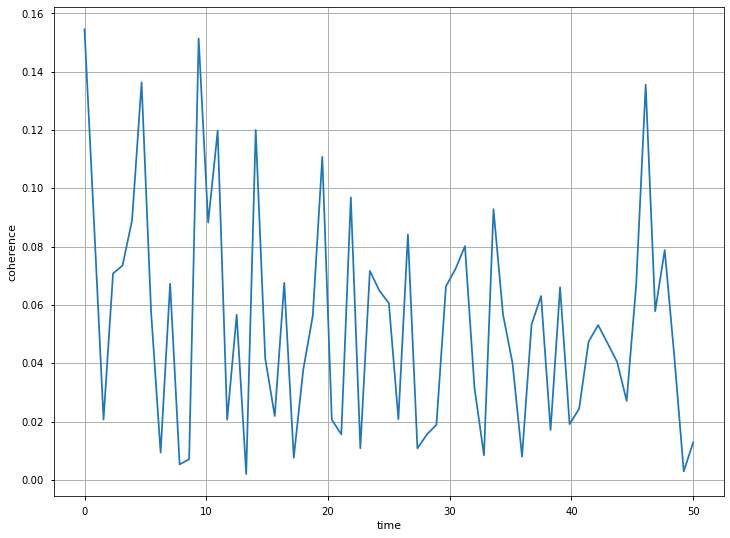

In [11]:
dt = 0.01
t = np.arange(0, 30, 0.01)
n1 = np.random.randn(len(t))
n2 = np.random.randn(len(t))

s1 = 1.5 * np.sin(2 * np.pi * 10 * t) + n1
s2 = np.cos(np.pi * t) + n2

plt.cohere(s1, s2 ** 2, 128, 1./dt)
plt.xlabel('time')
plt.ylabel('coherence');

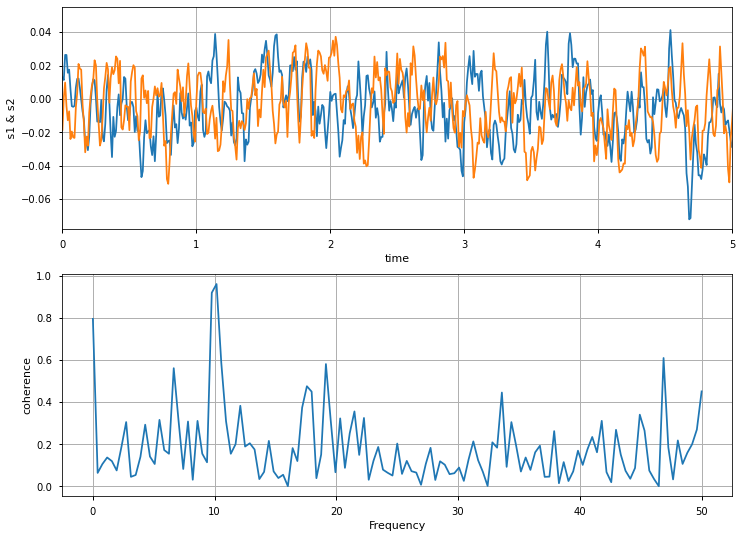

In [15]:
plt.subplots_adjust(wspace=1)

dt = 0.01
t = np.arange(0, 30, 0.01)
n1 = np.random.randn(len(t))
n2 = np.random.randn(len(t))
r = np.exp(-t/0.05)

c1 = np.convolve(n1, r, mode='same') * dt
c2 = np.convolve(n2, r, mode='same') * dt

s1 = 0.01 * np.sin(2 * np.pi * 10 * t) + c1
s2 = 0.01 * np.sin(2 * np.pi * 10 * t) + c2

plt.subplot(211)
plt.plot(t, s1, t, s2)
plt.xlim(0,5)
plt.xlabel('time')
plt.ylabel(' s1 & s2 ')
plt.grid(True)

plt.subplot(212)
plt.cohere(s1, s2, 256, 1./dt)
plt.ylabel('coherence');

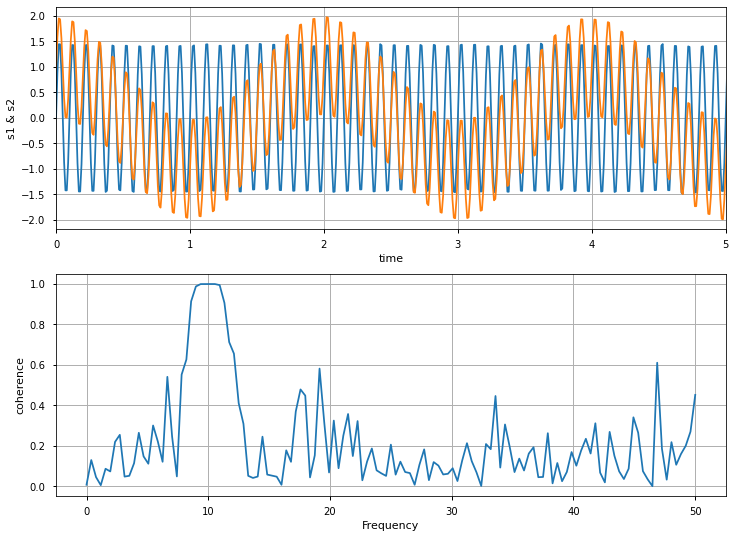

In [17]:
s1 = 1.5 * np.sin(2 * np.pi * 10 * t) + c1
s2 = np.cos(np.pi * t) + c2 + np.sin(2 * np.pi * 10 * t)

fig, [ax1, ax2] = plt.subplots(2, 1)
ax1.plot(t, s1, t, s2)
ax1.set_xlim(0, 5)
ax1.set_xlabel('time')
ax1.set_ylabel('s1 & s2')
ax1.grid(True)

ax2.cohere(s1, s2, 256, 1./dt)
ax2.set_ylabel('coherence');

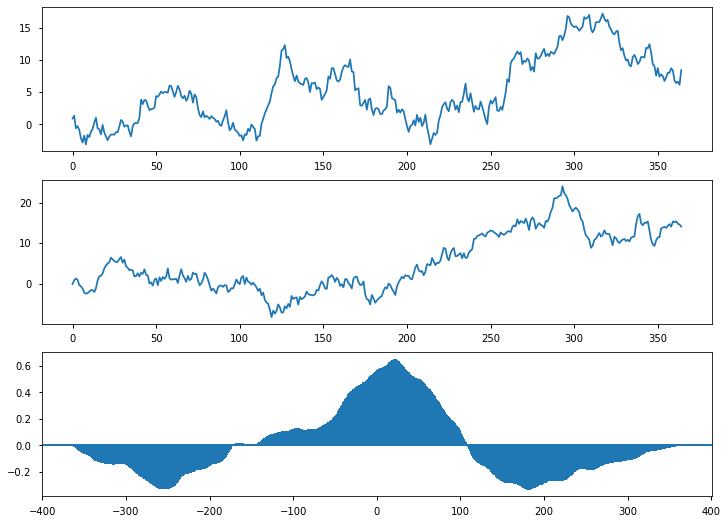

In [19]:
d1 = np.random.randn(365).cumsum( )
t1 = sum(d1)
av1 = t1/len(d1)
z1 = [i - av1 for i in d1]

d2 = np.random.randn(365).cumsum( )
t2 = sum(d2)
av2 = t2 / len(d2)
z2 = [i-av2 for i in d2]

fig = plt.figure()

ax1 = fig.add_subplot(311)
ax1.plot(d1)

ax2 = fig.add_subplot(312)
ax2.plot(d2)

ax3 = fig.add_subplot(313)
ax3.xcorr(z1, z2, usevlines=True, maxlags=None, normed=True, lw=2)
plt.ylim;